In [3]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import coint

In [25]:
stock1_ticker = 'RELIANCE.NS'
stock2_ticker = 'INFY.NS'

In [26]:
stock1_data = yf.download(stock1_ticker, start='2022-06-01', end='2023-06-13')
stock2_data = yf.download(stock2_ticker, start='2022-06-01', end='2023-06-13')

stock1_close = stock1_data['Close']
stock2_close = stock2_data['Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [27]:
correlation = np.corrcoef(stock1_close, stock2_close)[0, 1]
print(f"Correlation between {stock1_ticker} and {stock2_ticker}: {correlation}")

Correlation between RELIANCE.NS and INFY.NS: 0.3954419600159642


In [28]:
price_ratio = stock1_close / stock2_close
price_ratio_mean = np.mean(price_ratio)
price_ratio_std = np.std(price_ratio)
z_score = (price_ratio - price_ratio_mean) / price_ratio_std

In [29]:
print(f"price_ratio_mean = {price_ratio_mean}")
print(f"price_ratio_std = {price_ratio_std}")

price_ratio_mean = 1.6998361410409348
price_ratio_std = 0.12423567951925935


In [30]:
min_value = np.min(price_ratio)
print("Minimum value:", min_value)

max_value = np.max(price_ratio)
print("Maximum value:", max_value)

Minimum value: 1.4526435805003808
Maximum value: 1.99514149941798


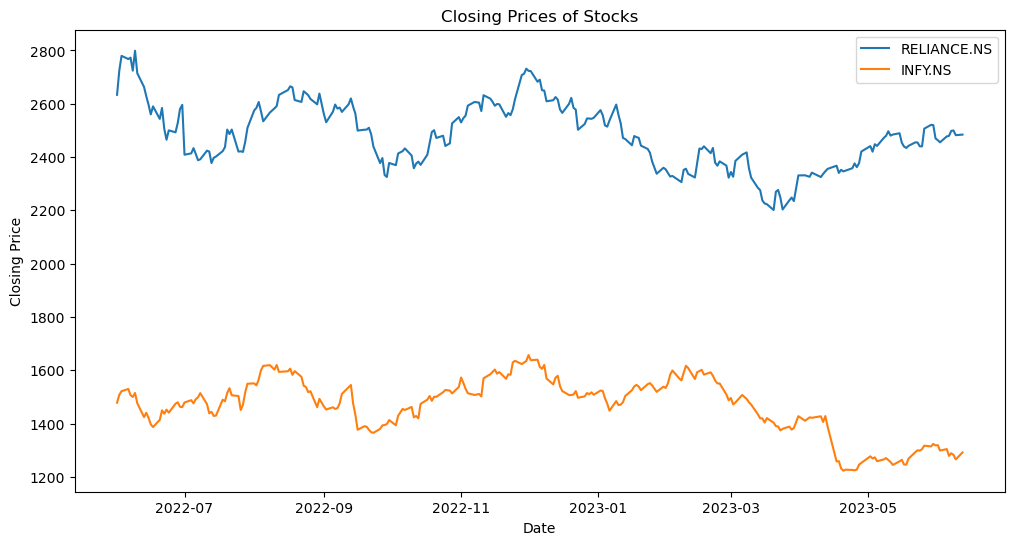

In [31]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(stock1_close.index, stock1_close, label=stock1_ticker)
ax.plot(stock2_close.index, stock2_close, label=stock2_ticker)
ax.set_xlabel('Date')
ax.set_ylabel('Closing Price')
ax.legend()
plt.title('Closing Prices of Stocks')
plt.show()

In [32]:
upper_entry_threshold = price_ratio.mean() + 2 * price_ratio.std()
lower_entry_threshold = price_ratio.mean() - 2 * price_ratio.std()
exit_threshold = price_ratio.mean()


In [24]:
Stock1 = 0
Stock2 = 0

for i in range(1, len(price_ratio)):
    # Entry Rules
    if price_ratio[i] > upper_entry_threshold and price_ratio[i - 1] <= upper_entry_threshold:
        # Go short on Stock 1
        Stock1 = -100  # Short 100 shares of Stock 1
        # Go long on Stock 2 with an equal amount of capital
        Stock2 = 100 * price_ratio[i]  # Long 100 shares of Stock 2 based on the current price ratio
        print(f"Entry: Short Stock 1 and Long Stock 2 at price ratio: {price_ratio[i]}")
    elif price_ratio[i] < lower_entry_threshold and price_ratio[i - 1] >= lower_entry_threshold:
        # Go long on Stock 1
        Stock1 = 100  # Long 100 shares of Stock 1
        # Go short on Stock 2 with an equal amount of capital
        Stock2 = -100 * price_ratio[i]  # Short 100 shares of Stock 2 based on the current price ratio
        print(f"Entry: Long Stock 1 and Short Stock 2 at price ratio: {price_ratio[i]}")

    # Exit Rule
    if price_ratio[i] > exit_threshold and price_ratio[i - 1] <= exit_threshold:
        # Close positions
        Stock1 = 0
        Stock2 = 0
        print(f"Exit: Close positions at price ratio: {price_ratio[i]}")
    elif price_ratio[i] < exit_threshold and price_ratio[i - 1] >= exit_threshold:
        # Close positions
        Stock1 = 0
        Stock2 = 0
        print(f"Exit: Close positions at price ratio: {price_ratio[i]}")

Entry: Long Stock 1 and Short Stock 2 at price ratio: 1.2509790263087586
Entry: Long Stock 1 and Short Stock 2 at price ratio: 1.2421245706221329
Entry: Long Stock 1 and Short Stock 2 at price ratio: 1.2498344291456436
Exit: Close positions at price ratio: 1.4735684332985988
Exit: Close positions at price ratio: 1.457608200215716
Exit: Close positions at price ratio: 1.482871130574803
Exit: Close positions at price ratio: 1.458692859379911
Exit: Close positions at price ratio: 1.4742016216489264
Exit: Close positions at price ratio: 1.4659532341878205
Exit: Close positions at price ratio: 1.4987871949639333
Exit: Close positions at price ratio: 1.4625333443391255
Exit: Close positions at price ratio: 1.573264569929352
Exit: Close positions at price ratio: 1.4657887108680006
Exit: Close positions at price ratio: 1.473964615347921
Exit: Close positions at price ratio: 1.465240709535493
Exit: Close positions at price ratio: 1.4726282186588022
Exit: Close positions at price ratio: 1.403388